In [1]:
# python
import sys
import os
import importlib
# columnar analysis
from coffea import processor
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
import awkward as ak
from dask.distributed import Client
# local
sys.path.insert(1, os.path.join(sys.path[0], '../..')) # fixme: there must be a better way to handle this...
from sidm.tools import ffschema, sidm_processor, utilities
# always reload local modules to pick up changes during development
importlib.reload(ffschema)
importlib.reload(sidm_processor)
importlib.reload(utilities)
# plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline
from tqdm.notebook import tqdm

In [2]:
samples_4mu = [
    "TTJets",
    
    "4mu_500GeV_5p0GeV_0p08mm",
    "4mu_500GeV_5p0GeV_0p8mm",
    "4mu_500GeV_5p0GeV_8p0mm",
    "4mu_500GeV_5p0GeV_40p0mm",
    "4mu_500GeV_5p0GeV_80p0mm",   
]
'''
samples_2mu = [
    "TTJets",
    
    "2mu2e_500GeV_5p0GeV_0p08mm",
    "2mu2e_500GeV_5p0GeV_0p8mm",
    "2mu2e_500GeV_5p0GeV_8p0mm",
    "2mu2e_500GeV_5p0GeV_40p0mm",
    "2mu2e_500GeV_5p0GeV_80p0mm",   
]
'''

'\nsamples_2mu = [\n    "TTJets",\n    \n    "2mu2e_500GeV_5p0GeV_0p08mm",\n    "2mu2e_500GeV_5p0GeV_0p8mm",\n    "2mu2e_500GeV_5p0GeV_8p0mm",\n    "2mu2e_500GeV_5p0GeV_40p0mm",\n    "2mu2e_500GeV_5p0GeV_80p0mm",   \n]\n'

In [3]:
fileset_4mu = utilities.make_fileset(samples_4mu, "llpNanoAOD_v2", max_files=1)
#fileset_2mu = utilities.make_fileset(samples_2mu, "llpNanoAOD_v2", max_files=1)

runner = processor.Runner(
    executor=processor.IterativeExecutor(),
    #executor=processor.FuturesExecutor(),
    schema=NanoAODSchema,
    #maxchunks=1,
)

channels = ["base"]
p = sidm_processor.SidmProcessor(
    channels,
    ["base"],
    lj_reco_choices=["0.4"],
    llpnanoaod=True,
)

output_4mu = runner.run(fileset_4mu, treename="Events", processor_instance=p)
#output_2mu = runner.run(fileset_2mu, treename="Events", processor_instance=p)

out_4mu = output_4mu["out"]
#out_2mu = output_2mu["out"]

Output()

Output()

/opt/conda/lib/python3.9/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: divide by zero encountered 
in divide
  result = getattr(ufunc, method)(

/opt/conda/lib/python3.9/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: invalid value encountered in
divide
  result = getattr(ufunc, method)(

#--------------------------------------------------------------------------
#                         FastJet release 3.4.0
#                 M. Cacciari, G.P. Salam and G. Soyez                  
#     A software package for jet finding and analysis at colliders      
#                           http://fastjet.fr                           
#	                                                                      
# Please cite EPJC72(2012)1896 [arXiv:1111.6097] if you use this package
# for scientific work and optionally PLB641(2006)57 [hep-ph/0512210].   
#                                                                       
# FastJet is provided without warranty under the GNU GPL v2 or higher.  
# It uses T. Chan's closest pair algorithm, S. Fortune's Voronoi code,
# CGAL and 3rd party plugin jet algorithms. See COPYING file for details.
#--------------------------------------------------------------------------


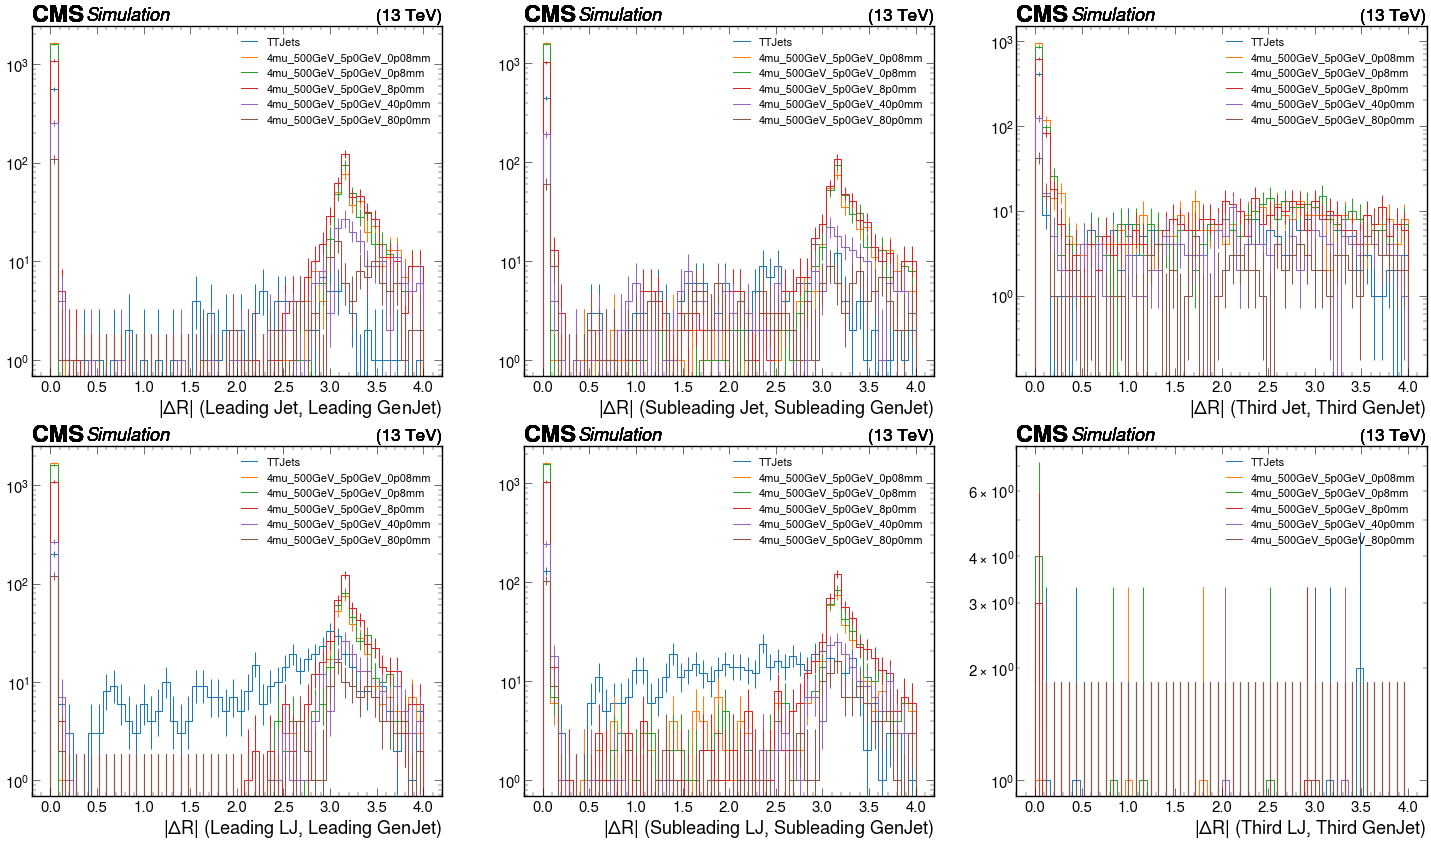

In [4]:
plt.subplots(2,3,figsize=(36,20))

plt.subplot(2,3,1)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["jet1_genjet1_absdR"][channels[0], :], flow='none', density=False)
plt.legend(samples_4mu, loc=1, prop={'size': 16})
plt.yscale('log')

plt.subplot(2,3,2)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["jet2_genjet2_absdR"][channels[0], :], flow='none', density=False)
plt.legend(samples_4mu, loc=1, prop={'size': 16})
plt.yscale('log')

plt.subplot(2,3,3)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["jet3_genjet3_absdR"][channels[0], :], flow='none', density=False)
plt.legend(samples_4mu, loc=1, prop={'size': 16})
plt.yscale('log')

plt.subplot(2,3,4)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["lj1_genjet1_absdR"][channels[0], :], flow='none', density=False)
plt.legend(samples_4mu, loc=1, prop={'size': 16})
plt.yscale('log')

plt.subplot(2,3,5)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["lj2_genjet2_absdR"][channels[0], :], flow='none', density=False)
plt.legend(samples_4mu, loc=1, prop={'size': 16})
plt.yscale('log')

plt.subplot(2,3,6)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["lj3_genjet3_absdR"][channels[0], :], flow='none', density=False)
plt.legend(samples_4mu, loc=1, prop={'size': 16})
plt.yscale('log')

/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)


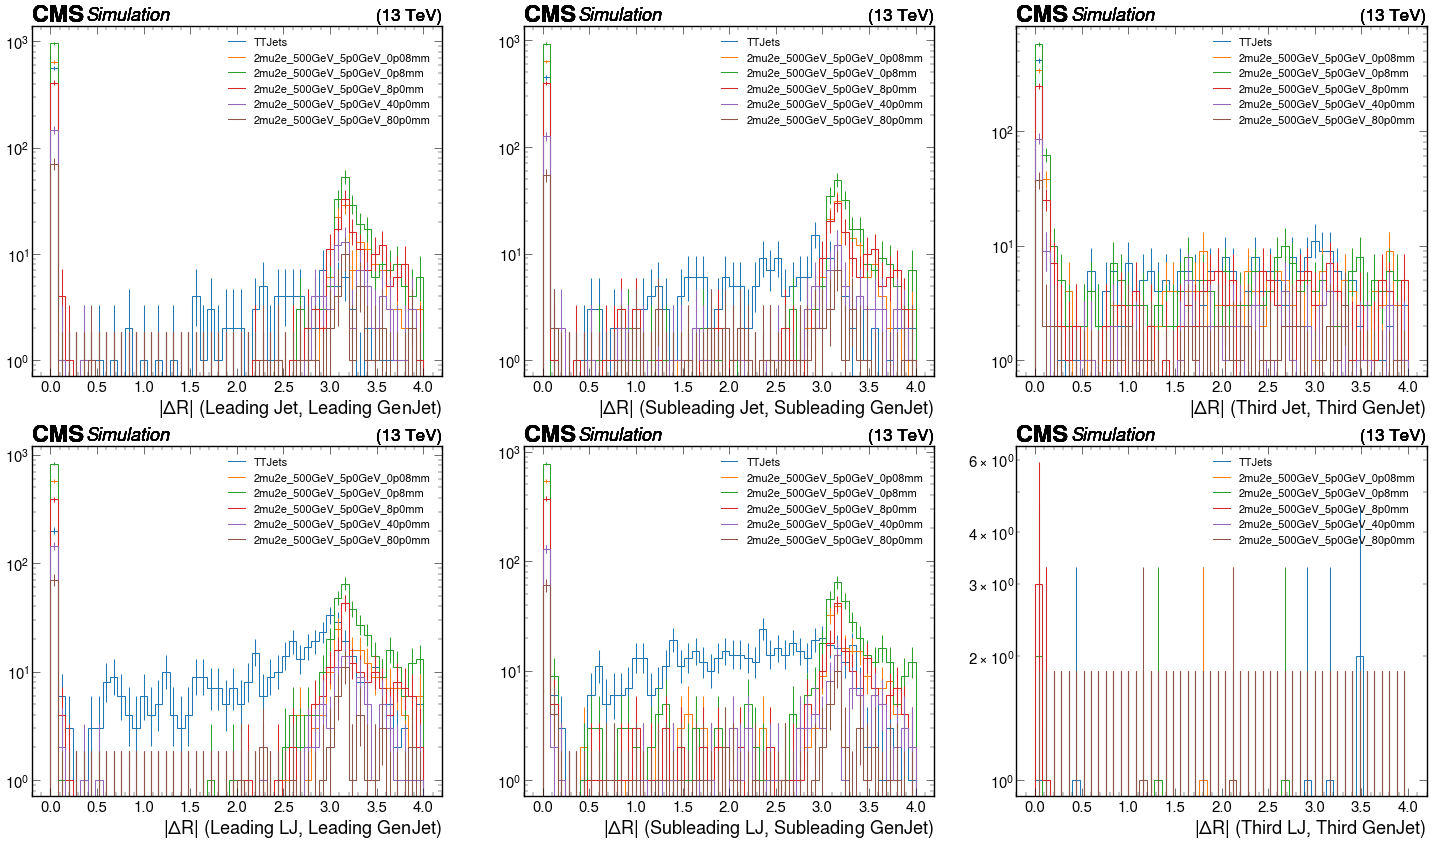

In [5]:
plt.subplots(2,3,figsize=(36,20))

plt.subplot(2,3,1)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["jet1_genjet1_absdR"][channels[0], :], flow='none', density=False)
plt.legend(samples_2mu, loc=1, prop={'size': 16})
plt.yscale('log')

plt.subplot(2,3,2)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["jet2_genjet2_absdR"][channels[0], :], flow='none', density=False)
plt.legend(samples_2mu, loc=1, prop={'size': 16})
plt.yscale('log')

plt.subplot(2,3,3)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["jet3_genjet3_absdR"][channels[0], :], flow='none', density=False)
plt.legend(samples_2mu, loc=1, prop={'size': 16})
plt.yscale('log')

plt.subplot(2,3,4)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["lj1_genjet1_absdR"][channels[0], :], flow='none', density=False)
plt.legend(samples_2mu, loc=1, prop={'size': 16})
plt.yscale('log')

plt.subplot(2,3,5)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["lj2_genjet2_absdR"][channels[0], :], flow='none', density=False)
plt.legend(samples_2mu, loc=1, prop={'size': 16})
plt.yscale('log')

plt.subplot(2,3,6)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["lj3_genjet3_absdR"][channels[0], :], flow='none', density=False)
plt.legend(samples_2mu, loc=1, prop={'size': 16})
plt.yscale('log')

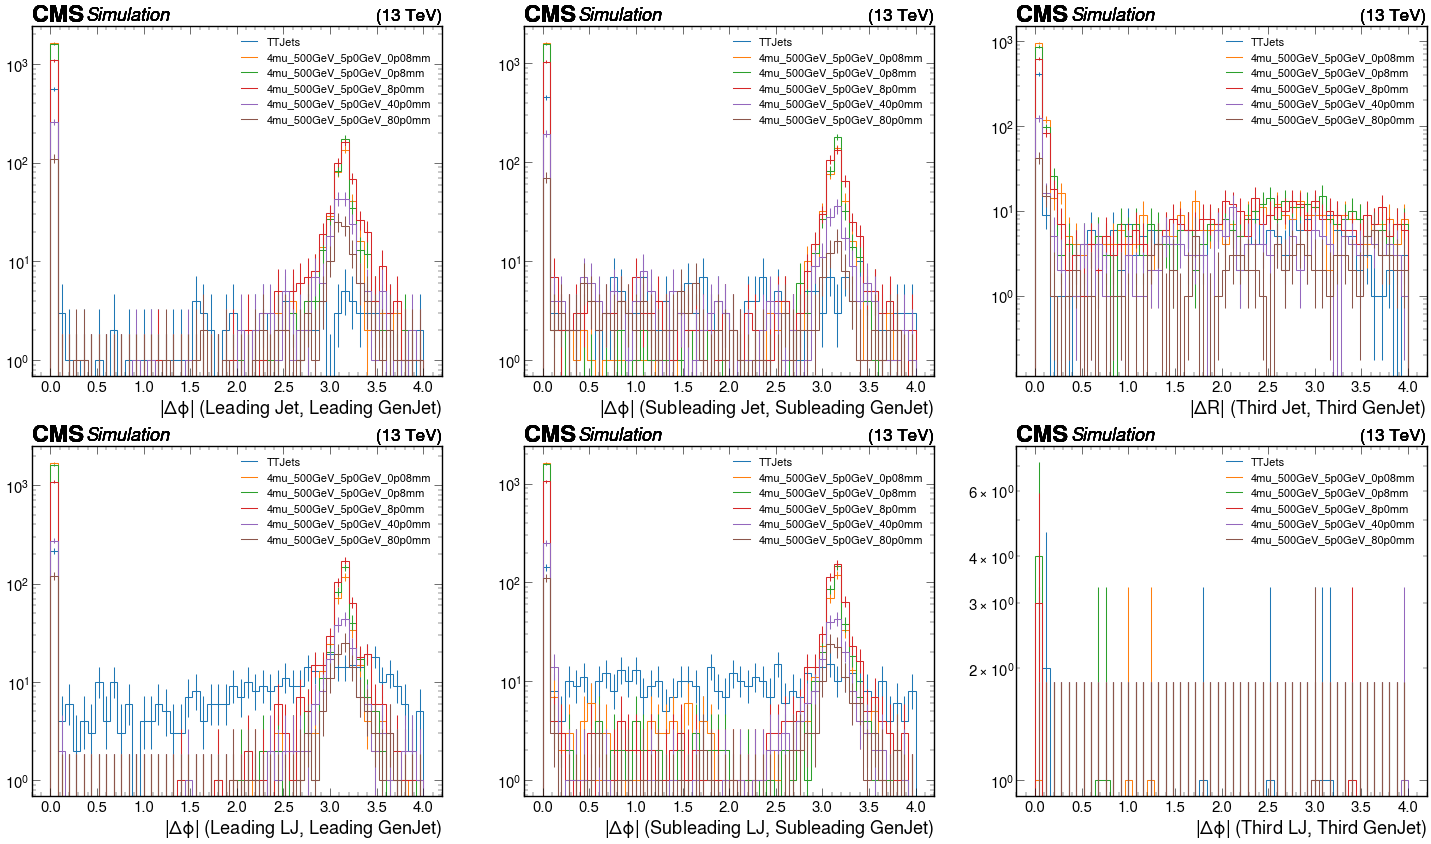

In [6]:
plt.subplots(2,3,figsize=(36,20))

plt.subplot(2,3,1)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["jet1_genjet1_absdphi"][channels[0], :], flow='none', density=False)
plt.legend(samples_4mu, loc=1, prop={'size': 16})
plt.yscale('log')

plt.subplot(2,3,2)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["jet2_genjet2_absdphi"][channels[0], :], flow='none', density=False)
plt.legend(samples_4mu, loc=1, prop={'size': 16})
plt.yscale('log')

plt.subplot(2,3,3)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["jet3_genjet3_absdR"][channels[0], :], flow='none', density=False)
plt.legend(samples_4mu, loc=1, prop={'size': 16})
plt.yscale('log')

plt.subplot(2,3,4)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["lj1_genjet1_absdphi"][channels[0], :], flow='none', density=False)
plt.legend(samples_4mu, loc=1, prop={'size': 16})
plt.yscale('log')

plt.subplot(2,3,5)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["lj2_genjet2_absdphi"][channels[0], :], flow='none', density=False)
plt.legend(samples_4mu, loc=1, prop={'size': 16})
plt.yscale('log')

plt.subplot(2,3,6)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["lj3_genjet3_absdphi"][channels[0], :], flow='none', density=False)
plt.legend(samples_4mu, loc=1, prop={'size': 16})
plt.yscale('log')

/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)


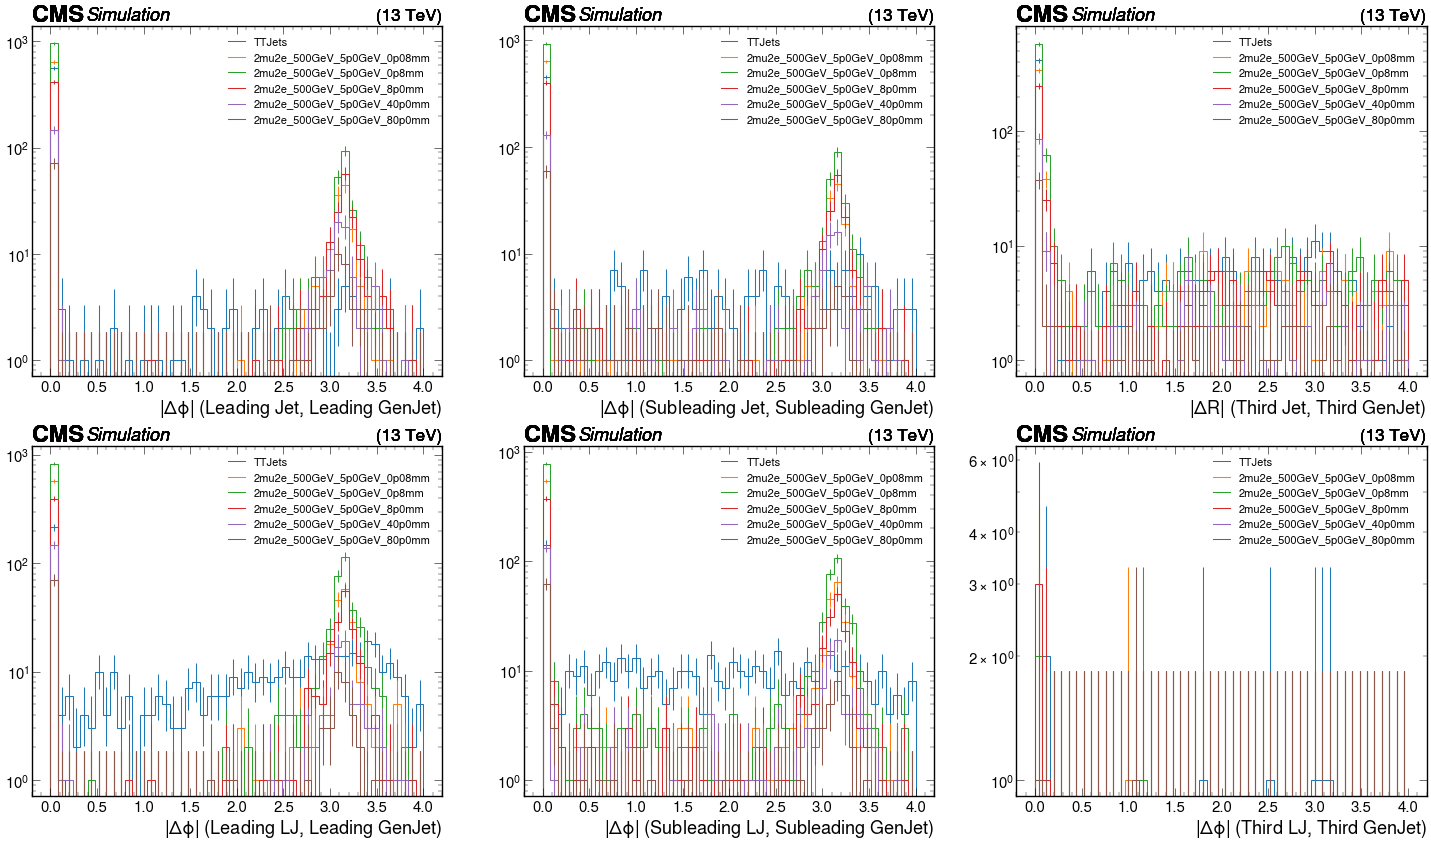

In [7]:
plt.subplots(2,3,figsize=(36,20))

plt.subplot(2,3,1)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["jet1_genjet1_absdphi"][channels[0], :], flow='none', density=False)
plt.legend(samples_2mu, loc=1, prop={'size': 16})
plt.yscale('log')

plt.subplot(2,3,2)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["jet2_genjet2_absdphi"][channels[0], :], flow='none', density=False)
plt.legend(samples_2mu, loc=1, prop={'size': 16})
plt.yscale('log')

plt.subplot(2,3,3)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["jet3_genjet3_absdR"][channels[0], :], flow='none', density=False)
plt.legend(samples_2mu, loc=1, prop={'size': 16})
plt.yscale('log')

plt.subplot(2,3,4)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["lj1_genjet1_absdphi"][channels[0], :], flow='none', density=False)
plt.legend(samples_2mu, loc=1, prop={'size': 16})
plt.yscale('log')

plt.subplot(2,3,5)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["lj2_genjet2_absdphi"][channels[0], :], flow='none', density=False)
plt.legend(samples_2mu, loc=1, prop={'size': 16})
plt.yscale('log')

plt.subplot(2,3,6)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["lj3_genjet3_absdphi"][channels[0], :], flow='none', density=False)
plt.legend(samples_2mu, loc=1, prop={'size': 16})
plt.yscale('log')

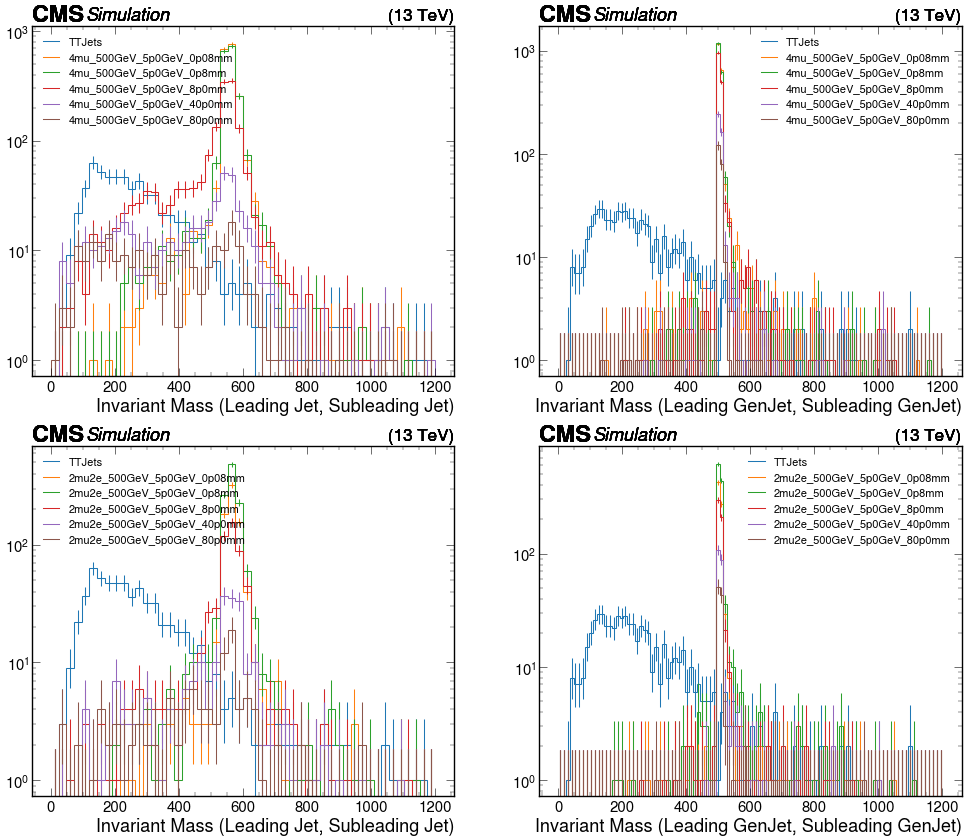

In [8]:
plt.subplots(2,2,figsize=(24,20))

plt.subplot(2,2,1)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["jet_jet_invmass"][channels[0], :], flow='none', density=False)
plt.legend(samples_4mu, loc=2, prop={'size': 16})
plt.yscale('log')

plt.subplot(2,2,2)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["genjet_genjet_invmass"][channels[0], :], flow='none', density=False)
plt.legend(samples_4mu, loc=1, prop={'size': 16})
plt.yscale('log')

plt.subplot(2,2,3)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["jet_jet_invmass"][channels[0], :], flow='none', density=False)
plt.legend(samples_2mu, loc=2, prop={'size': 16})
plt.yscale('log')

plt.subplot(2,2,4)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["genjet_genjet_invmass"][channels[0], :], flow='none', density=False)
plt.legend(samples_2mu, loc=1, prop={'size': 16})
plt.yscale('log')

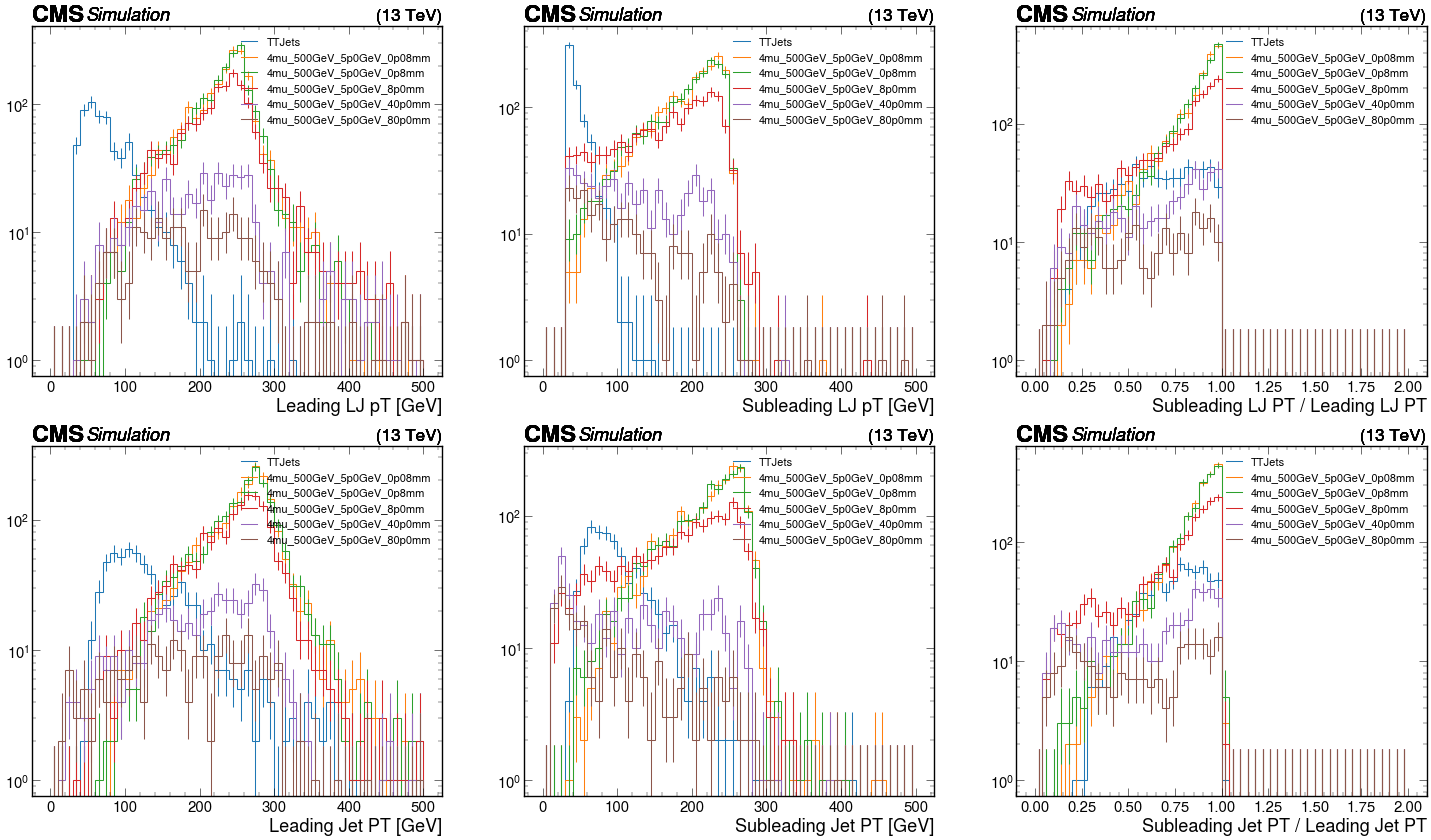

In [24]:
plt.subplots(2,3,figsize=(36,20))

plt.subplot(2,3,1)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["lj0_pt"][channels[0], :], flow='none', density=False)
plt.legend(samples_4mu, loc=1, prop={'size': 16})
plt.yscale('log')

plt.subplot(2,3,2)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["lj1_pt"][channels[0], :], flow='none', density=False)
plt.legend(samples_4mu, loc=1, prop={'size': 16})
plt.yscale('log')

plt.subplot(2,3,3)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["lj_lj_ptRatio"][channels[0], :], flow='none', density=False)
plt.legend(samples_4mu, loc=1, prop={'size': 16})
plt.yscale('log')

plt.subplot(2,3,4)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["jet1_pt"][channels[0], :], flow='none', density=False)
plt.legend(samples_4mu, loc=1, prop={'size': 16})
plt.yscale('log')

plt.subplot(2,3,5)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["jet2_pt"][channels[0], :], flow='none', density=False)
plt.legend(samples_4mu, loc=1, prop={'size': 16})
plt.yscale('log')

plt.subplot(2,3,6)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["jet_jet_ptRatio"][channels[0], :], flow='none', density=False)
plt.legend(samples_4mu, loc=1, prop={'size': 16})
plt.yscale('log')

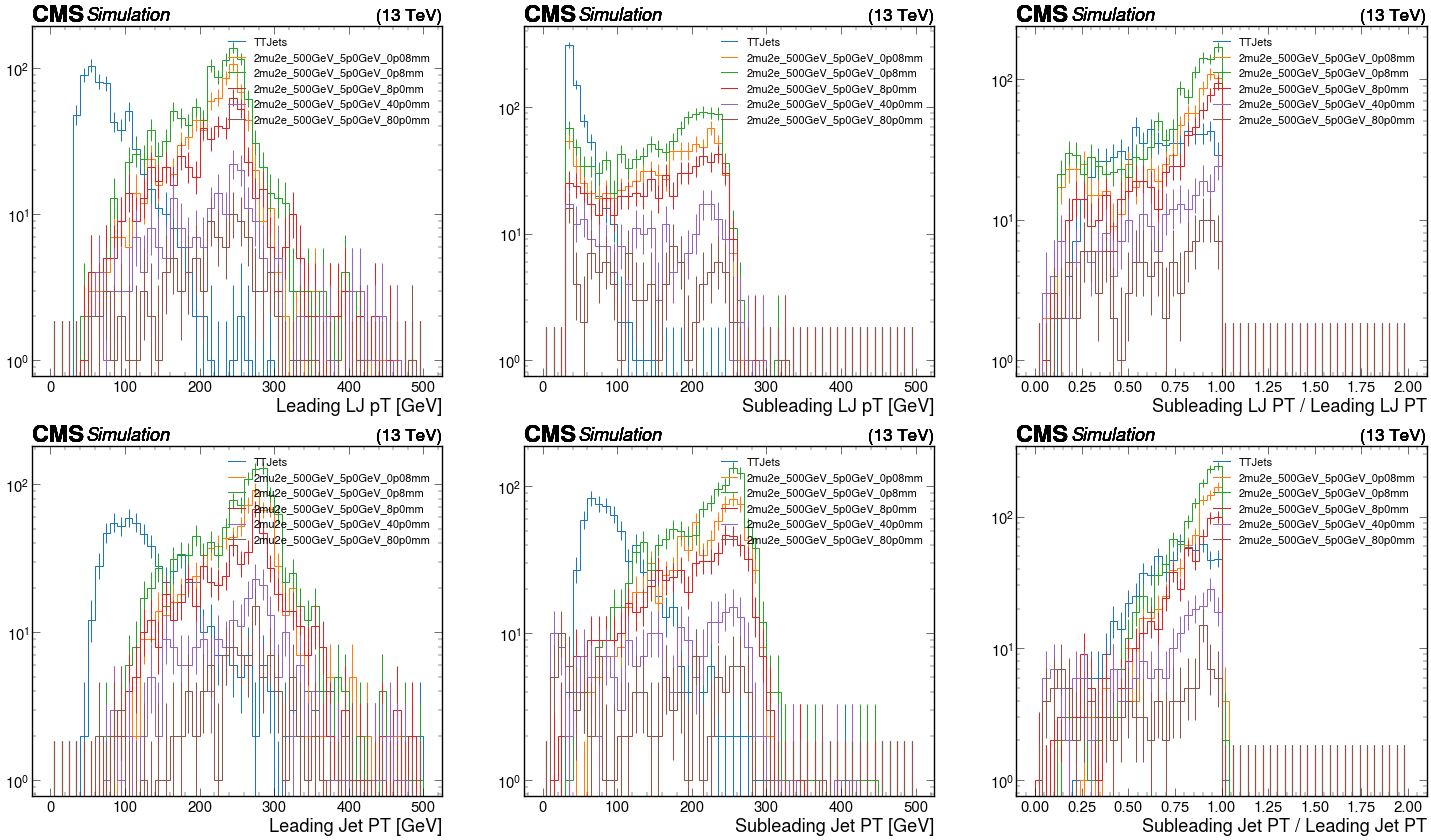

In [10]:
plt.subplots(2,3,figsize=(36,20))

plt.subplot(2,3,1)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["lj0_pt"][channels[0], :], flow='none', density=False)
plt.legend(samples_2mu, loc=1, prop={'size': 16})
plt.yscale('log')

plt.subplot(2,3,2)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["lj1_pt"][channels[0], :], flow='none', density=False)
plt.legend(samples_2mu, loc=1, prop={'size': 16})
plt.yscale('log')

plt.subplot(2,3,3)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["lj_lj_ptRatio"][channels[0], :], flow='none', density=False)
plt.legend(samples_2mu, loc=1, prop={'size': 16})
plt.yscale('log')

plt.subplot(2,3,4)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["jet1_pt"][channels[0], :], flow='none', density=False)
plt.legend(samples_2mu, loc=1, prop={'size': 16})
plt.yscale('log')

plt.subplot(2,3,5)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["jet2_pt"][channels[0], :], flow='none', density=False)
plt.legend(samples_2mu, loc=1, prop={'size': 16})
plt.yscale('log')

plt.subplot(2,3,6)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["jet_jet_ptRatio"][channels[0], :], flow='none', density=False)
plt.legend(samples_2mu, loc=1, prop={'size': 16})
plt.yscale('log')

/tmp/ipykernel_875/2485365845.py:8: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,10000)
/tmp/ipykernel_875/2485365845.py:15: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,10000)
/tmp/ipykernel_875/2485365845.py:22: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,10000)
/tmp/ipykernel_875/2485365845.py:29: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,10000)
/tmp/ipykernel_875/2485365845.py:36: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,10000)
/tmp/ipykernel_875/2485365845.py:43: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,10000)


(0.7196022312661908, 10000)

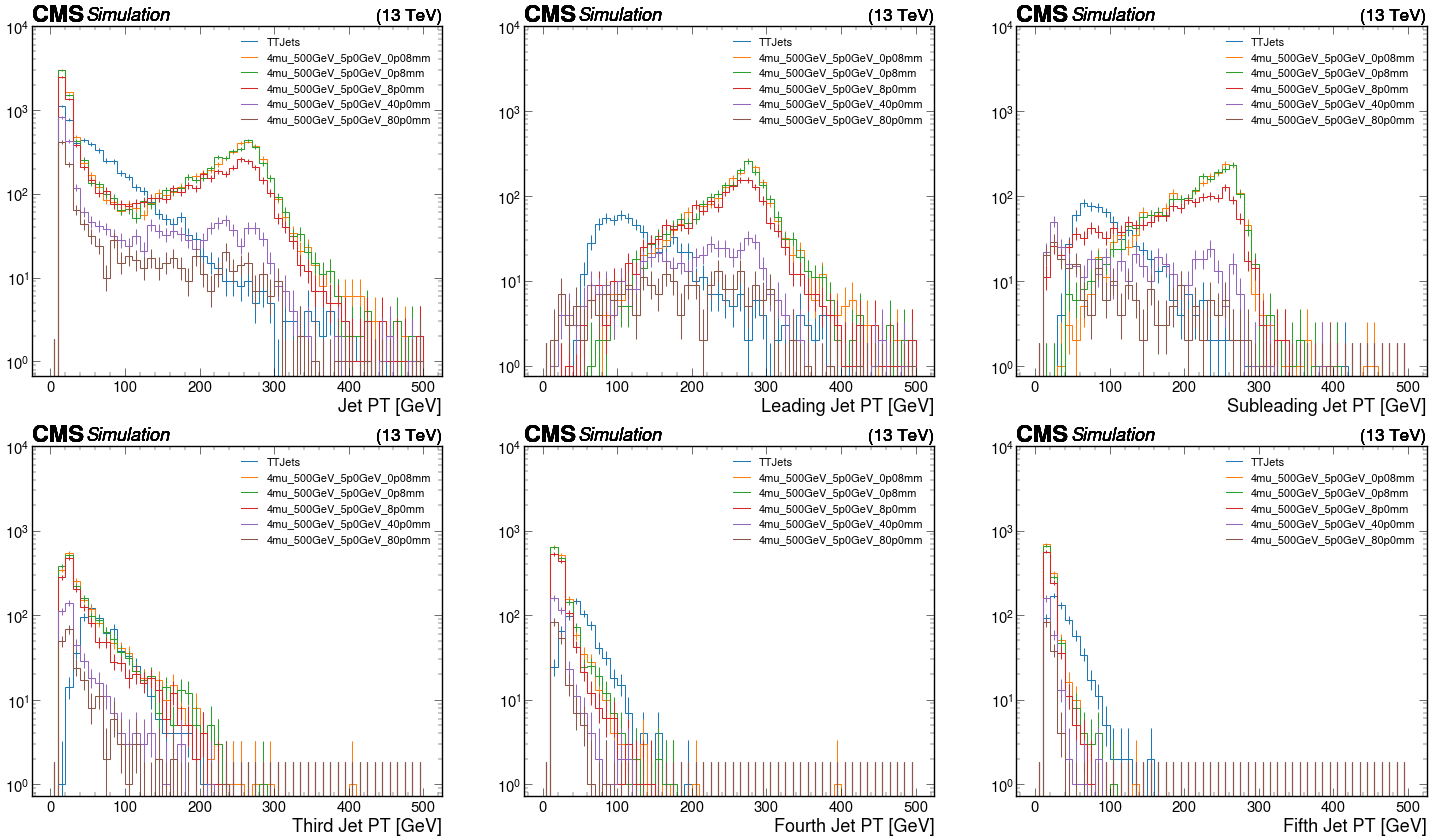

In [11]:
plt.subplots(2,3,figsize=(36,20))

plt.subplot(2,3,1)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["jet_pt"][channels[0], :], flow='none', density=False)
plt.legend(samples_4mu, loc=1, prop={'size': 16})
plt.yscale('log')
plt.ylim(0,10000)

plt.subplot(2,3,2)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["jet1_pt"][channels[0], :], flow='none', density=False)
plt.legend(samples_4mu, loc=1, prop={'size': 16})
plt.yscale('log')
plt.ylim(0,10000)

plt.subplot(2,3,3)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["jet2_pt"][channels[0], :], flow='none', density=False)
plt.legend(samples_4mu, loc=1, prop={'size': 16})
plt.yscale('log')
plt.ylim(0,10000)

plt.subplot(2,3,4)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["jet3_pt"][channels[0], :], flow='none', density=False)
plt.legend(samples_4mu, loc=1, prop={'size': 16})
plt.yscale('log')
plt.ylim(0,10000)

plt.subplot(2,3,5)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["jet4_pt"][channels[0], :], flow='none', density=False)
plt.legend(samples_4mu, loc=1, prop={'size': 16})
plt.yscale('log')
plt.ylim(0,10000)

plt.subplot(2,3,6)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["jet5_pt"][channels[0], :], flow='none', density=False)
plt.legend(samples_4mu, loc=1, prop={'size': 16})
plt.yscale('log')
plt.ylim(0,10000)

/tmp/ipykernel_875/1397114071.py:8: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,10000)
/tmp/ipykernel_875/1397114071.py:15: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,10000)
/tmp/ipykernel_875/1397114071.py:22: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,10000)
/tmp/ipykernel_875/1397114071.py:29: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,10000)
/tmp/ipykernel_875/1397114071.py:36: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,10000)
/tmp/ipykernel_875/1397114071.py:43: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,10000)


(0.7382632685896108, 10000)

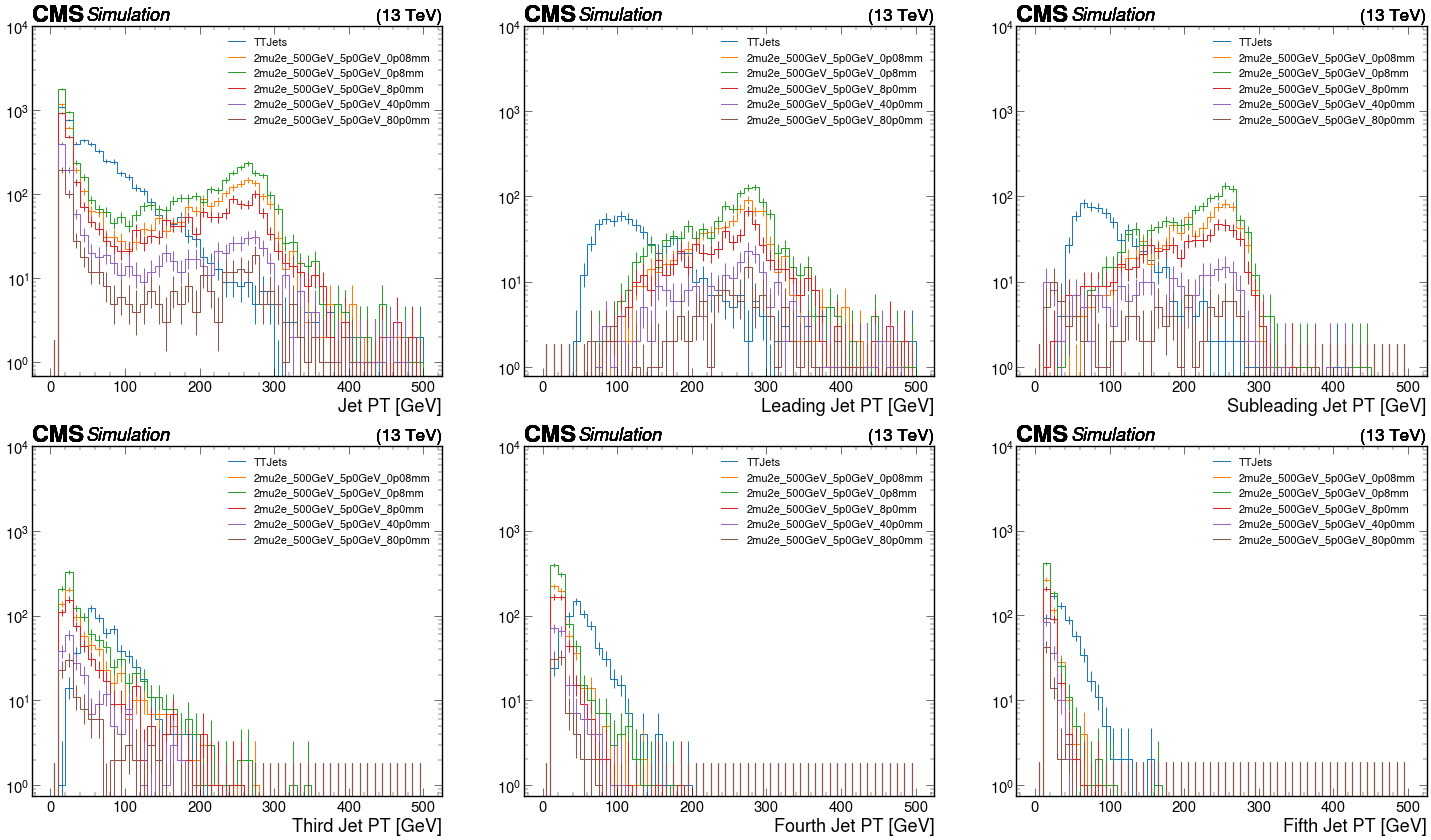

In [12]:
plt.subplots(2,3,figsize=(36,20))

plt.subplot(2,3,1)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["jet_pt"][channels[0], :], flow='none', density=False)
plt.legend(samples_2mu, loc=1, prop={'size': 16})
plt.yscale('log')
plt.ylim(0,10000)

plt.subplot(2,3,2)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["jet1_pt"][channels[0], :], flow='none', density=False)
plt.legend(samples_2mu, loc=1, prop={'size': 16})
plt.yscale('log')
plt.ylim(0,10000)

plt.subplot(2,3,3)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["jet2_pt"][channels[0], :], flow='none', density=False)
plt.legend(samples_2mu, loc=1, prop={'size': 16})
plt.yscale('log')
plt.ylim(0,10000)

plt.subplot(2,3,4)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["jet3_pt"][channels[0], :], flow='none', density=False)
plt.legend(samples_2mu, loc=1, prop={'size': 16})
plt.yscale('log')
plt.ylim(0,10000)

plt.subplot(2,3,5)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["jet4_pt"][channels[0], :], flow='none', density=False)
plt.legend(samples_2mu, loc=1, prop={'size': 16})
plt.yscale('log')
plt.ylim(0,10000)

plt.subplot(2,3,6)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["jet5_pt"][channels[0], :], flow='none', density=False)
plt.legend(samples_2mu, loc=1, prop={'size': 16})
plt.yscale('log')
plt.ylim(0,10000)

/tmp/ipykernel_875/2028490734.py:8: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,1000)
/tmp/ipykernel_875/2028490734.py:15: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,1000)
/tmp/ipykernel_875/2028490734.py:22: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,1000)
/tmp/ipykernel_875/2028490734.py:29: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,1000)
/tmp/ipykernel_875/2028490734.py:36: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,1000)
/tmp/ipykernel_875/2028490734.py:43: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,1000)


(0.8543043834373333, 1000)

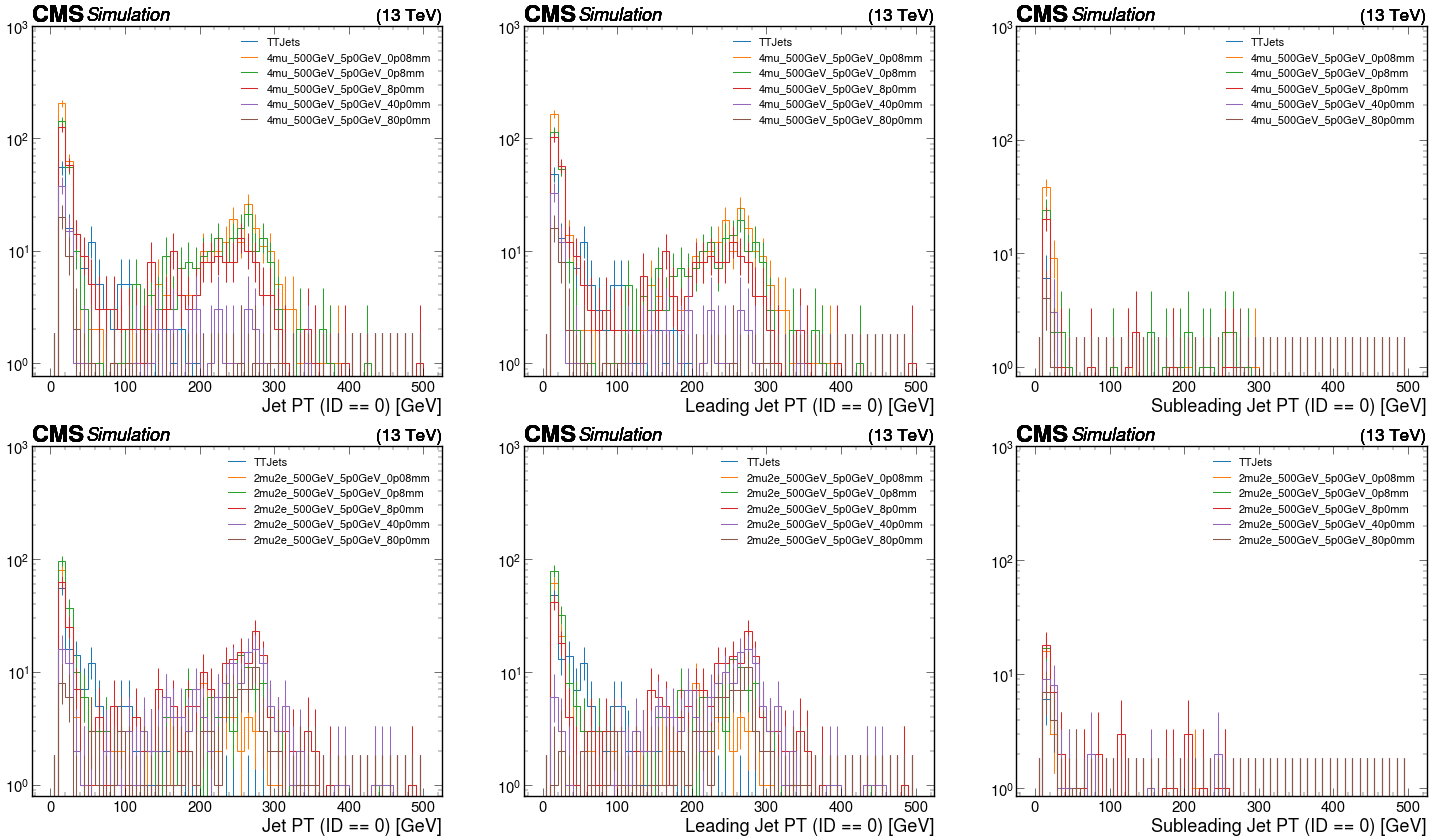

In [13]:
plt.subplots(2,3,figsize=(36,20))

plt.subplot(2,3,1)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["jetID0_pt"][channels[0], :], flow='none', density=False)
plt.legend(samples_4mu, loc=1, prop={'size': 16})
plt.yscale('log')
plt.ylim(0,1000)

plt.subplot(2,3,2)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["jetID0_leading_pt"][channels[0], :], flow='none', density=False)
plt.legend(samples_4mu, loc=1, prop={'size': 16})
plt.yscale('log')
plt.ylim(0,1000)

plt.subplot(2,3,3)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["jetID0_subleading_pt"][channels[0], :], flow='none', density=False)
plt.legend(samples_4mu, loc=1, prop={'size': 16})
plt.yscale('log')
plt.ylim(0,1000)

plt.subplot(2,3,4)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["jetID0_pt"][channels[0], :], flow='none', density=False)
plt.legend(samples_2mu, loc=1, prop={'size': 16})
plt.yscale('log')
plt.ylim(0,1000)

plt.subplot(2,3,5)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["jetID0_leading_pt"][channels[0], :], flow='none', density=False)
plt.legend(samples_2mu, loc=1, prop={'size': 16})
plt.yscale('log')
plt.ylim(0,1000)

plt.subplot(2,3,6)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["jetID0_subleading_pt"][channels[0], :], flow='none', density=False)
plt.legend(samples_2mu, loc=1, prop={'size': 16})
plt.yscale('log')
plt.ylim(0,1000)

/tmp/ipykernel_875/4053643021.py:8: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,1000)
/tmp/ipykernel_875/4053643021.py:15: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,1000)
/tmp/ipykernel_875/4053643021.py:22: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,1000)
/tmp/ipykernel_875/4053643021.py:29: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,1000)
/tmp/ipykernel_875/4053643021.py:36: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,1000)
/tmp/ipykernel_875/4053643021.py:43: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,1000)


(0.7901823516696123, 1000)

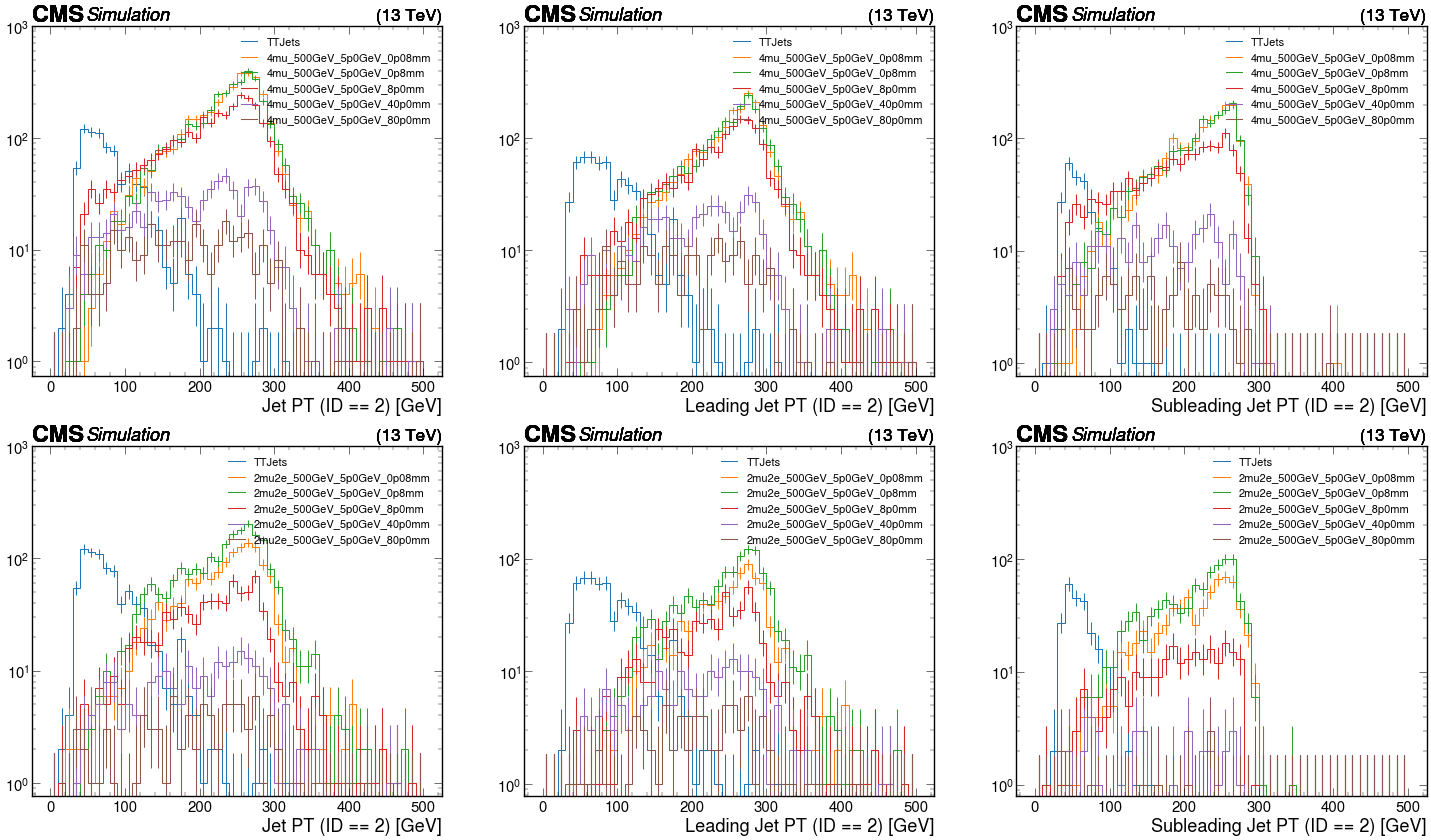

In [14]:
plt.subplots(2,3,figsize=(36,20))

plt.subplot(2,3,1)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["jetID2_pt"][channels[0], :], flow='none', density=False)
plt.legend(samples_4mu, loc=1, prop={'size': 16})
plt.yscale('log')
plt.ylim(0,1000)

plt.subplot(2,3,2)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["jetID2_leading_pt"][channels[0], :], flow='none', density=False)
plt.legend(samples_4mu, loc=1, prop={'size': 16})
plt.yscale('log')
plt.ylim(0,1000)

plt.subplot(2,3,3)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["jetID2_subleading_pt"][channels[0], :], flow='none', density=False)
plt.legend(samples_4mu, loc=1, prop={'size': 16})
plt.yscale('log')
plt.ylim(0,1000)

plt.subplot(2,3,4)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["jetID2_pt"][channels[0], :], flow='none', density=False)
plt.legend(samples_2mu, loc=1, prop={'size': 16})
plt.yscale('log')
plt.ylim(0,1000)

plt.subplot(2,3,5)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["jetID2_leading_pt"][channels[0], :], flow='none', density=False)
plt.legend(samples_2mu, loc=1, prop={'size': 16})
plt.yscale('log')
plt.ylim(0,1000)

plt.subplot(2,3,6)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["jetID2_subleading_pt"][channels[0], :], flow='none', density=False)
plt.legend(samples_2mu, loc=1, prop={'size': 16})
plt.yscale('log')
plt.ylim(0,1000)

/tmp/ipykernel_875/4275184811.py:8: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,1000)
/tmp/ipykernel_875/4275184811.py:15: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,1000)
/tmp/ipykernel_875/4275184811.py:22: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,1000)
/tmp/ipykernel_875/4275184811.py:29: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,1000)
/tmp/ipykernel_875/4275184811.py:36: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,1000)
/tmp/ipykernel_875/4275184811.py:43: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,1000)


(0.7423430618688227, 1000)

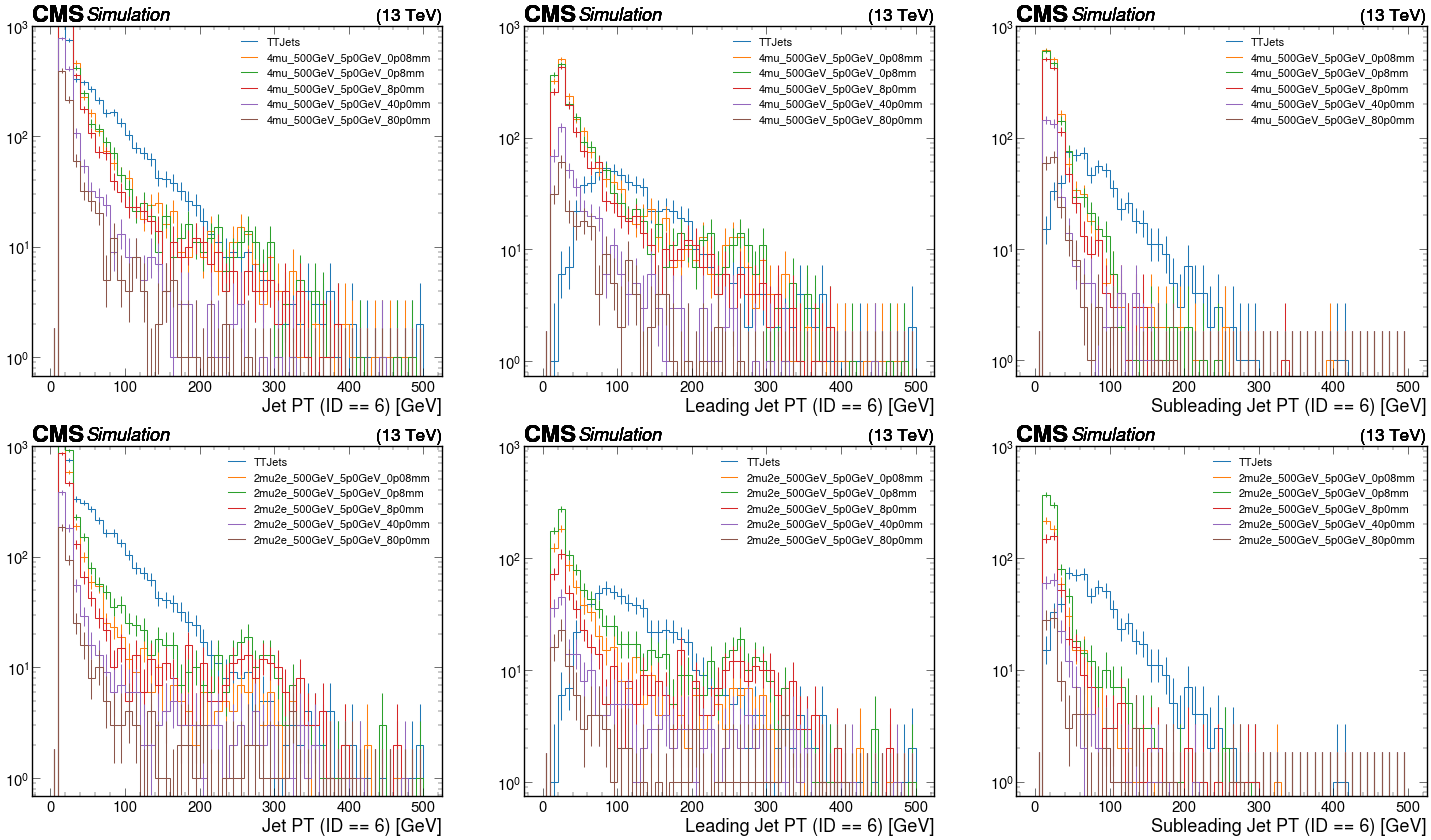

In [15]:
plt.subplots(2,3,figsize=(36,20))

plt.subplot(2,3,1)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["jetID6_pt"][channels[0], :], flow='none', density=False)
plt.legend(samples_4mu, loc=1, prop={'size': 16})
plt.yscale('log')
plt.ylim(0,1000)

plt.subplot(2,3,2)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["jetID6_leading_pt"][channels[0], :], flow='none', density=False)
plt.legend(samples_4mu, loc=1, prop={'size': 16})
plt.yscale('log')
plt.ylim(0,1000)

plt.subplot(2,3,3)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["jetID6_subleading_pt"][channels[0], :], flow='none', density=False)
plt.legend(samples_4mu, loc=1, prop={'size': 16})
plt.yscale('log')
plt.ylim(0,1000)

plt.subplot(2,3,4)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["jetID6_pt"][channels[0], :], flow='none', density=False)
plt.legend(samples_2mu, loc=1, prop={'size': 16})
plt.yscale('log')
plt.ylim(0,1000)

plt.subplot(2,3,5)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["jetID6_leading_pt"][channels[0], :], flow='none', density=False)
plt.legend(samples_2mu, loc=1, prop={'size': 16})
plt.yscale('log')
plt.ylim(0,1000)

plt.subplot(2,3,6)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["jetID6_subleading_pt"][channels[0], :], flow='none', density=False)
plt.legend(samples_2mu, loc=1, prop={'size': 16})
plt.yscale('log')
plt.ylim(0,1000)

/tmp/ipykernel_875/668369579.py:8: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,1000)
/tmp/ipykernel_875/668369579.py:15: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,1000)
/tmp/ipykernel_875/668369579.py:22: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,1000)
/tmp/ipykernel_875/668369579.py:29: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,1000)


(0.8154329793777234, 1000)

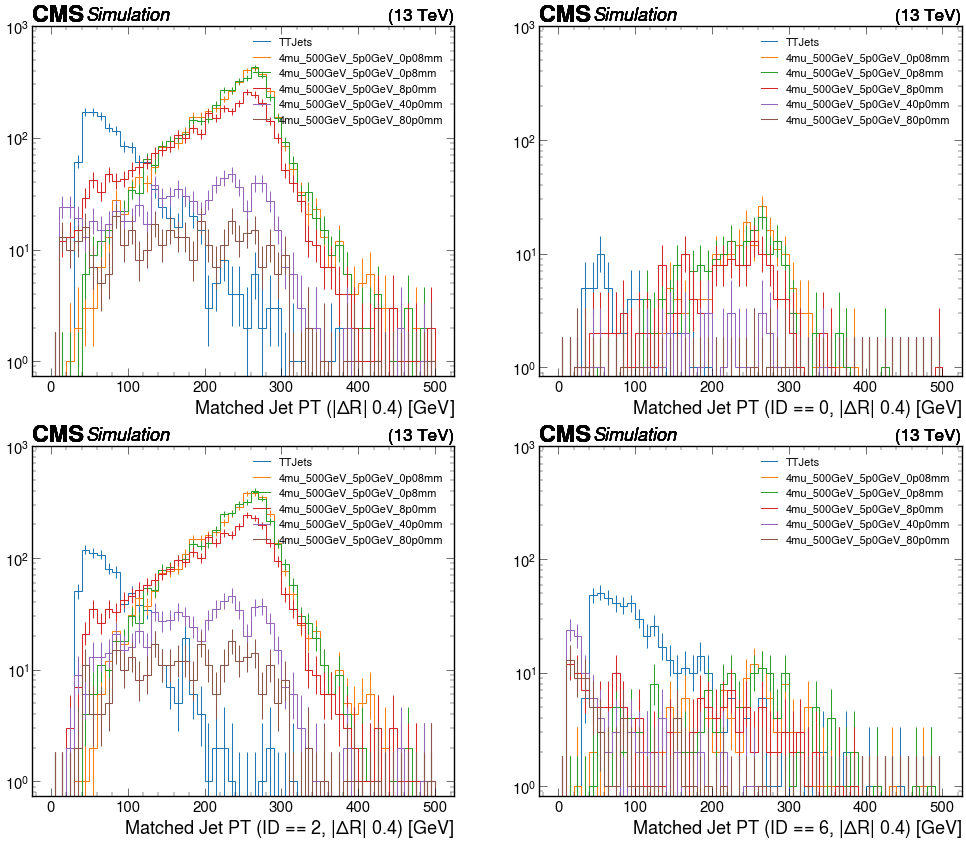

In [16]:
plt.subplots(2,2,figsize=(24,20))

plt.subplot(2,2,1)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["matchedjet_pt"][channels[0], :], flow='none', density=False)
plt.legend(samples_4mu, loc=1, prop={'size': 16})
plt.yscale('log')
plt.ylim(0,1000)

plt.subplot(2,2,2)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["matchedjetID0_pt"][channels[0], :], flow='none', density=False)
plt.legend(samples_4mu, loc=1, prop={'size': 16})
plt.yscale('log')
plt.ylim(0,1000)

plt.subplot(2,2,3)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["matchedjetID2_pt"][channels[0], :], flow='none', density=False)
plt.legend(samples_4mu, loc=1, prop={'size': 16})
plt.yscale('log')
plt.ylim(0,1000)

plt.subplot(2,2,4)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["matchedjetID6_pt"][channels[0], :], flow='none', density=False)
plt.legend(samples_4mu, loc=1, prop={'size': 16})
plt.yscale('log')
plt.ylim(0,1000)

/tmp/ipykernel_875/15204523.py:8: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,1000)
/tmp/ipykernel_875/15204523.py:15: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,1000)
/tmp/ipykernel_875/15204523.py:22: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,1000)
/tmp/ipykernel_875/15204523.py:29: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,1000)


(0.8154329793777234, 1000)

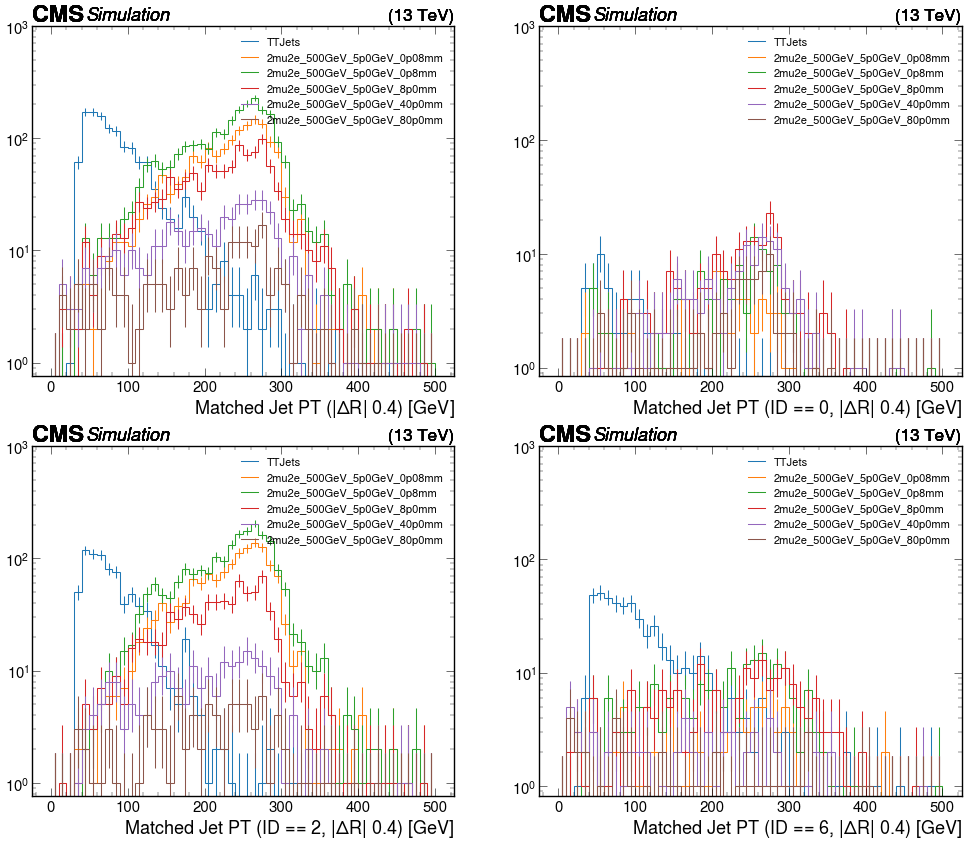

In [17]:
plt.subplots(2,2,figsize=(24,20))

plt.subplot(2,2,1)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["matchedjet_pt"][channels[0], :], flow='none', density=False)
plt.legend(samples_2mu, loc=1, prop={'size': 16})
plt.yscale('log')
plt.ylim(0,1000)

plt.subplot(2,2,2)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["matchedjetID0_pt"][channels[0], :], flow='none', density=False)
plt.legend(samples_2mu, loc=1, prop={'size': 16})
plt.yscale('log')
plt.ylim(0,1000)

plt.subplot(2,2,3)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["matchedjetID2_pt"][channels[0], :], flow='none', density=False)
plt.legend(samples_2mu, loc=1, prop={'size': 16})
plt.yscale('log')
plt.ylim(0,1000)

plt.subplot(2,2,4)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["matchedjetID6_pt"][channels[0], :], flow='none', density=False)
plt.legend(samples_2mu, loc=1, prop={'size': 16})
plt.yscale('log')
plt.ylim(0,1000)

/tmp/ipykernel_875/4078265794.py:8: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,10000)
/tmp/ipykernel_875/4078265794.py:15: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,10000)
/tmp/ipykernel_875/4078265794.py:22: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,10000)
/tmp/ipykernel_875/4078265794.py:29: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,10000)


(0.04105858714859635, 10000)

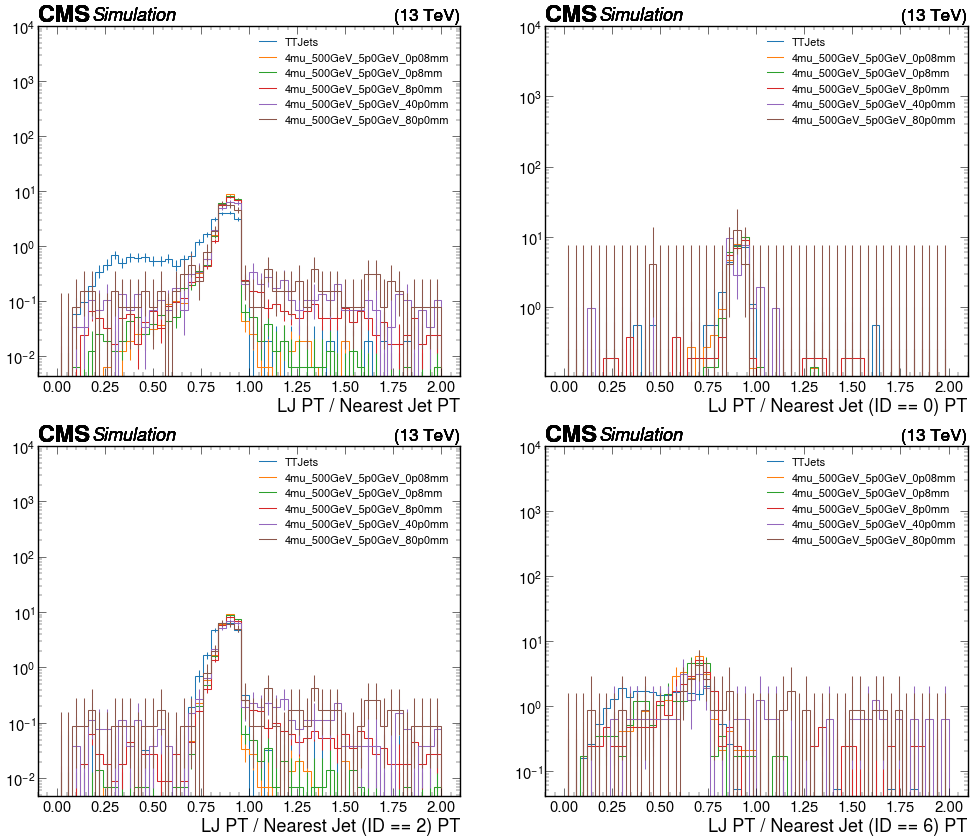

In [18]:
plt.subplots(2,2,figsize=(24,20))

plt.subplot(2,2,1)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["lj_nearestjet_ptRatio"][channels[0], :], flow='none', density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 16})
plt.yscale('log')
plt.ylim(0,10000)

plt.subplot(2,2,2)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["lj_nearestjet0_ptRatio"][channels[0], :], flow='none', density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 16})
plt.yscale('log')
plt.ylim(0,10000)

plt.subplot(2,2,3)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["lj_nearestjet2_ptRatio"][channels[0], :], flow='none', density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 16})
plt.yscale('log')
plt.ylim(0,10000)

plt.subplot(2,2,4)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["lj_nearestjet6_ptRatio"][channels[0], :], flow='none', density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 16})
plt.yscale('log')
plt.ylim(0,10000)

/tmp/ipykernel_875/1821037988.py:8: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,10000)
/tmp/ipykernel_875/1821037988.py:15: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,10000)
/tmp/ipykernel_875/1821037988.py:22: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,10000)
/tmp/ipykernel_875/1821037988.py:29: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,10000)


(0.8255088124319212, 10000)

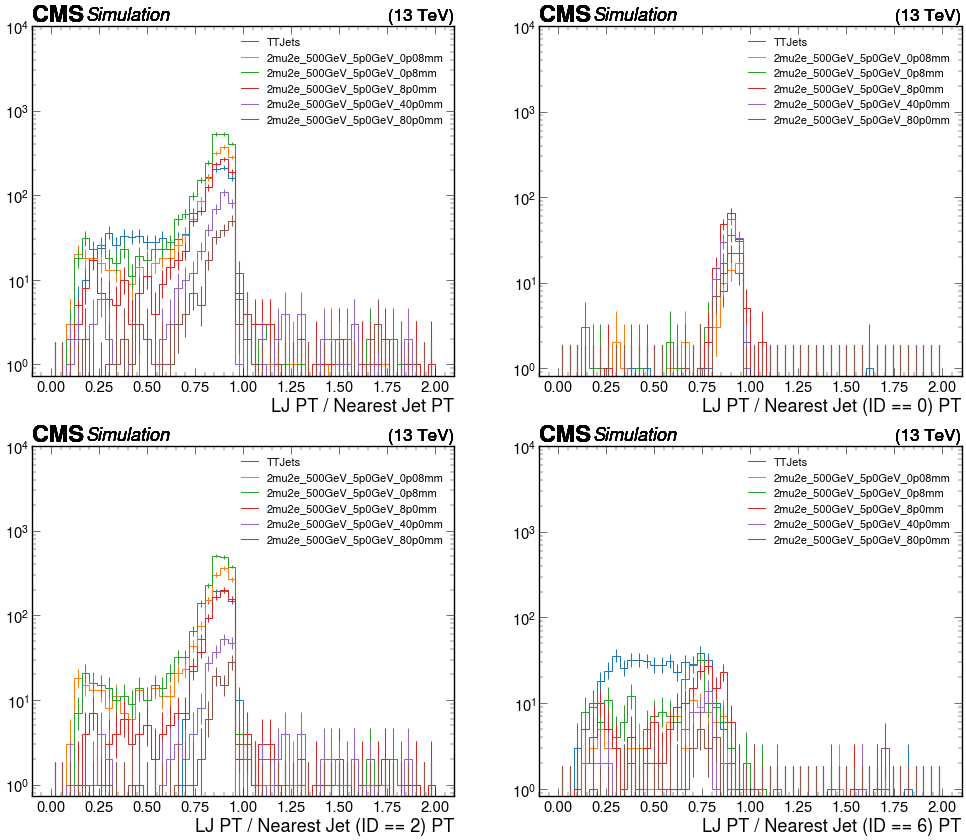

In [19]:
plt.subplots(2,2,figsize=(24,20))

plt.subplot(2,2,1)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["lj_nearestjet_ptRatio"][channels[0], :], flow='none', density=False)
plt.legend(samples_2mu, loc=1, prop={'size': 16})
plt.yscale('log')
plt.ylim(0,10000)

plt.subplot(2,2,2)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["lj_nearestjet0_ptRatio"][channels[0], :], flow='none', density=False)
plt.legend(samples_2mu, loc=1, prop={'size': 16})
plt.yscale('log')
plt.ylim(0,10000)

plt.subplot(2,2,3)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["lj_nearestjet2_ptRatio"][channels[0], :], flow='none', density=False)
plt.legend(samples_2mu, loc=1, prop={'size': 16})
plt.yscale('log')
plt.ylim(0,10000)

plt.subplot(2,2,4)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["lj_nearestjet6_ptRatio"][channels[0], :], flow='none', density=False)
plt.legend(samples_2mu, loc=1, prop={'size': 16})
plt.yscale('log')
plt.ylim(0,10000)

/tmp/ipykernel_875/927076737.py:8: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,1000)
/tmp/ipykernel_875/927076737.py:15: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,1000)
/tmp/ipykernel_875/927076737.py:22: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,1000)
/tmp/ipykernel_875/927076737.py:29: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,1000)


(0.7618140408273846, 1000)

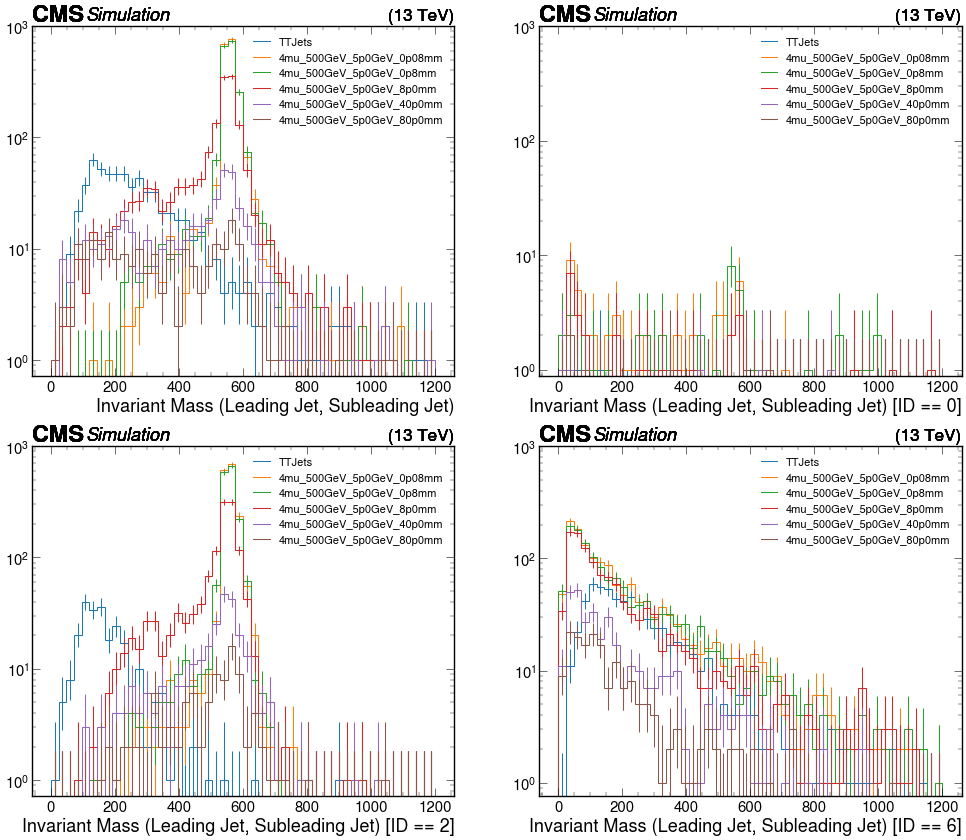

In [20]:
plt.subplots(2,2,figsize=(24,20))

plt.subplot(2,2,1)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["jet_jet_invmass"][channels[0], :], flow='none', density=False)
plt.legend(samples_4mu, loc=1, prop={'size': 16})
plt.yscale('log')
plt.ylim(0,1000)

plt.subplot(2,2,2)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["jet0_jet0_invmass"][channels[0], :], flow='none', density=False)
plt.legend(samples_4mu, loc=1, prop={'size': 16})
plt.yscale('log')
plt.ylim(0,1000)

plt.subplot(2,2,3)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["jet2_jet2_invmass"][channels[0], :], flow='none', density=False)
plt.legend(samples_4mu, loc=1, prop={'size': 16})
plt.yscale('log')
plt.ylim(0,1000)

plt.subplot(2,2,4)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["jet6_jet6_invmass"][channels[0], :], flow='none', density=False)
plt.legend(samples_4mu, loc=1, prop={'size': 16})
plt.yscale('log')
plt.ylim(0,1000)

/tmp/ipykernel_875/1968797644.py:8: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,1000)
/tmp/ipykernel_875/1968797644.py:15: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,1000)
/tmp/ipykernel_875/1968797644.py:22: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,1000)
/tmp/ipykernel_875/1968797644.py:29: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,1000)


(0.7815666253597835, 1000)

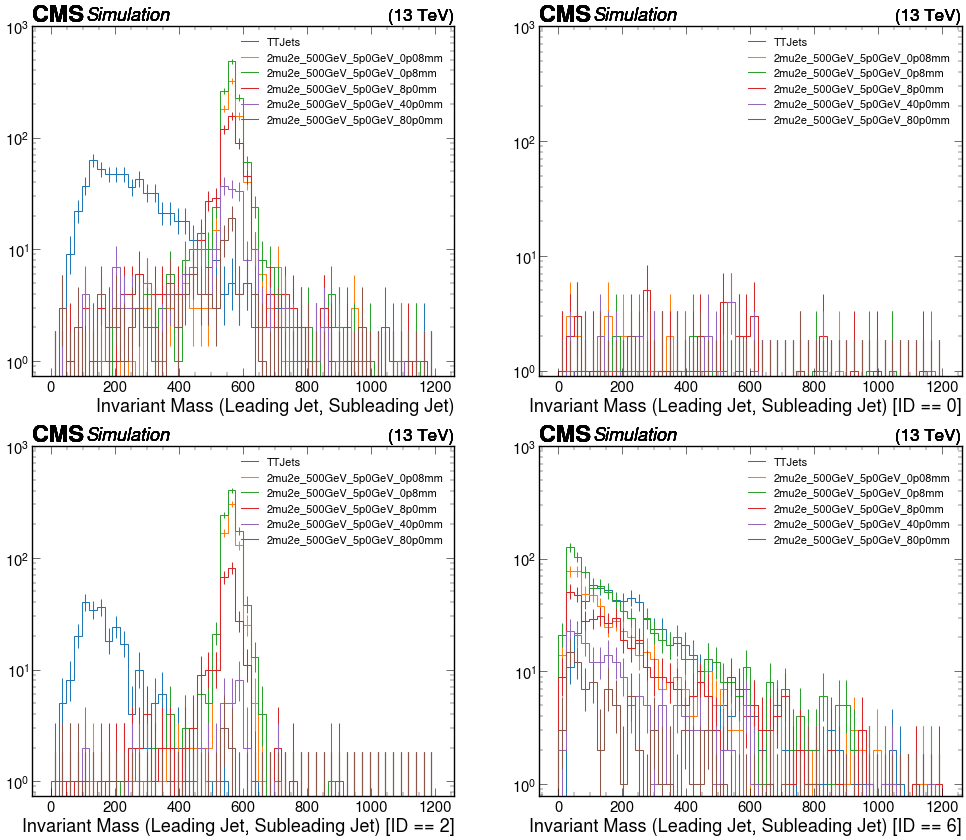

In [21]:
plt.subplots(2,2,figsize=(24,20))

plt.subplot(2,2,1)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["jet_jet_invmass"][channels[0], :], flow='none', density=False)
plt.legend(samples_2mu, loc=1, prop={'size': 16})
plt.yscale('log')
plt.ylim(0,1000)

plt.subplot(2,2,2)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["jet0_jet0_invmass"][channels[0], :], flow='none', density=False)
plt.legend(samples_2mu, loc=1, prop={'size': 16})
plt.yscale('log')
plt.ylim(0,1000)

plt.subplot(2,2,3)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["jet2_jet2_invmass"][channels[0], :], flow='none', density=False)
plt.legend(samples_2mu, loc=1, prop={'size': 16})
plt.yscale('log')
plt.ylim(0,1000)

plt.subplot(2,2,4)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["jet6_jet6_invmass"][channels[0], :], flow='none', density=False)
plt.legend(samples_2mu, loc=1, prop={'size': 16})
plt.yscale('log')
plt.ylim(0,1000)

/tmp/ipykernel_875/477313282.py:8: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,1000)
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/tmp/ipykernel_875/477313282.py:15: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,1000)
/tmp/ipykernel_875/477313282.py:22: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,1000)
/tmp/ipykernel_875/477313282.py:29: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,1000)


(0.8609805600007747, 1000)

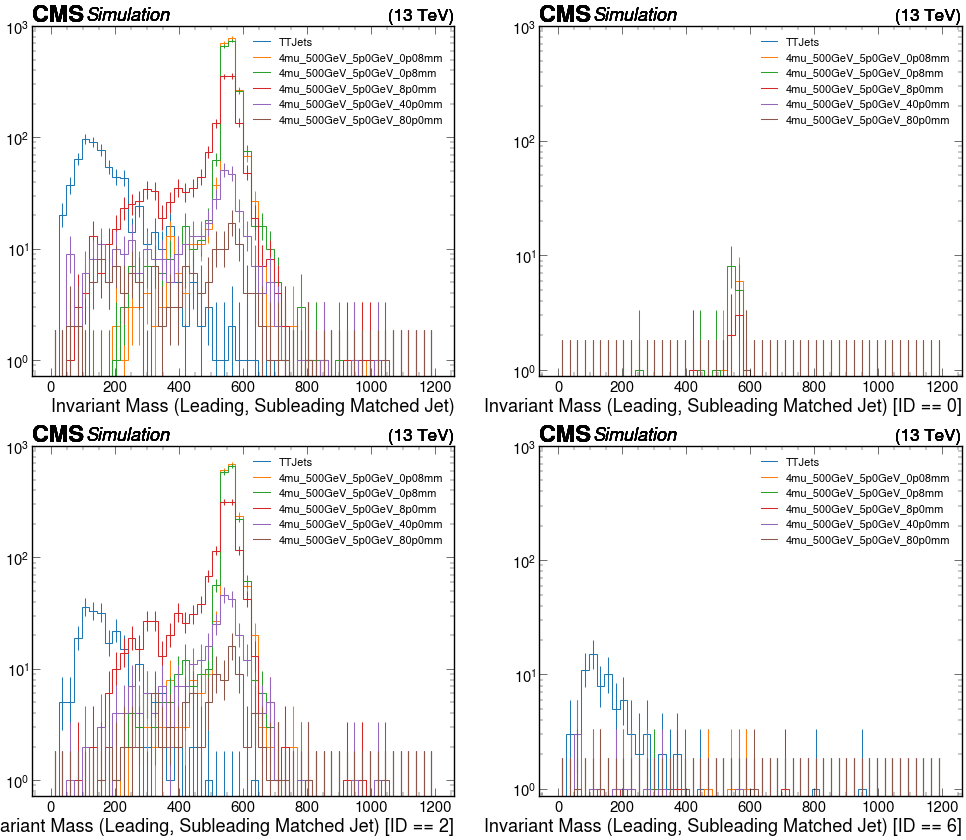

In [22]:
plt.subplots(2,2,figsize=(24,20))

plt.subplot(2,2,1)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["matchedjet_matchedjet_invmass"][channels[0], :], flow='none', density=False)
plt.legend(samples_4mu, loc=1, prop={'size': 16})
plt.yscale('log')
plt.ylim(0,1000)

plt.subplot(2,2,2)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["matchedjet0_matchedjet0_invmass"][channels[0], :], flow='none', density=False)
plt.legend(samples_4mu, loc=1, prop={'size': 16})
plt.yscale('log')
plt.ylim(0,1000)

plt.subplot(2,2,3)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["matchedjet2_matchedjet2_invmass"][channels[0], :], flow='none', density=False)
plt.legend(samples_4mu, loc=1, prop={'size': 16})
plt.yscale('log')
plt.ylim(0,1000)

plt.subplot(2,2,4)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["matchedjet6_matchedjet6_invmass"][channels[0], :], flow='none', density=False)
plt.legend(samples_4mu, loc=1, prop={'size': 16})
plt.yscale('log')
plt.ylim(0,1000)

/tmp/ipykernel_875/2477069219.py:8: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,1000)
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/tmp/ipykernel_875/2477069219.py:15: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,1000)
/tmp/ipykernel_875/2477069219.py:22: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,1000)
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances)

(0.8609805600007747, 1000)

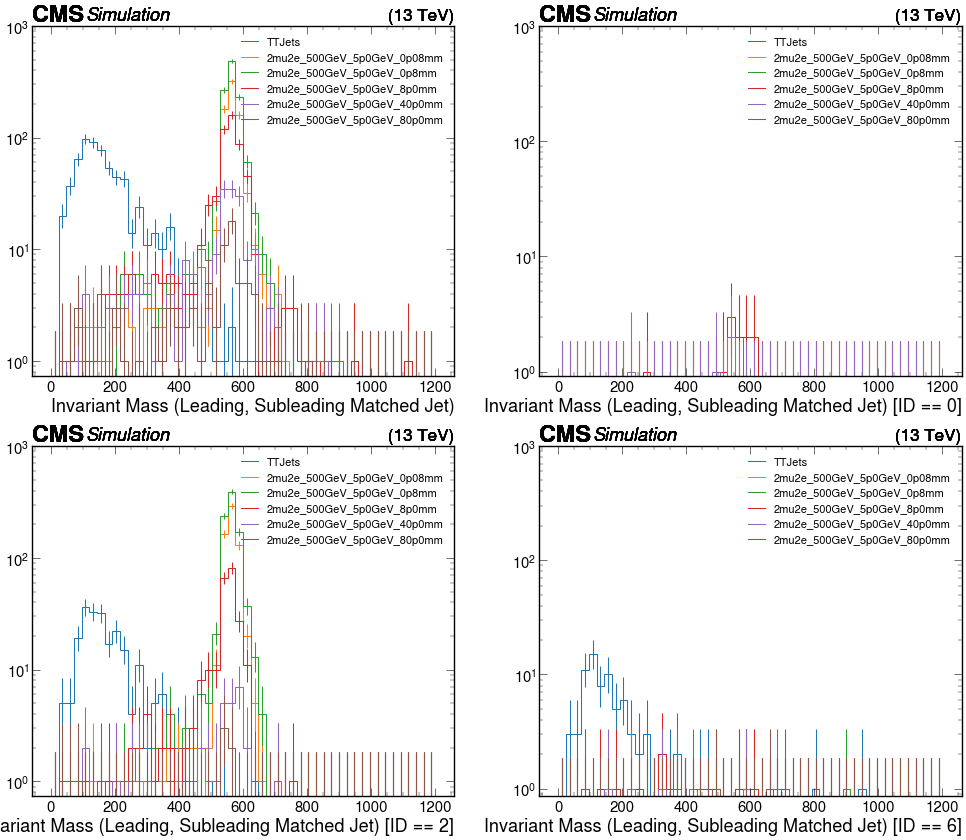

In [23]:
plt.subplots(2,2,figsize=(24,20))

plt.subplot(2,2,1)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["matchedjet_matchedjet_invmass"][channels[0], :], flow='none', density=False)
plt.legend(samples_2mu, loc=1, prop={'size': 16})
plt.yscale('log')
plt.ylim(0,1000)

plt.subplot(2,2,2)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["matchedjet0_matchedjet0_invmass"][channels[0], :], flow='none', density=False)
plt.legend(samples_2mu, loc=1, prop={'size': 16})
plt.yscale('log')
plt.ylim(0,1000)

plt.subplot(2,2,3)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["matchedjet2_matchedjet2_invmass"][channels[0], :], flow='none', density=False)
plt.legend(samples_2mu, loc=1, prop={'size': 16})
plt.yscale('log')
plt.ylim(0,1000)

plt.subplot(2,2,4)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["matchedjet6_matchedjet6_invmass"][channels[0], :], flow='none', density=False)
plt.legend(samples_2mu, loc=1, prop={'size': 16})
plt.yscale('log')
plt.ylim(0,1000)

KeyError: 'matchedjet_matchedjet_ptRatio'

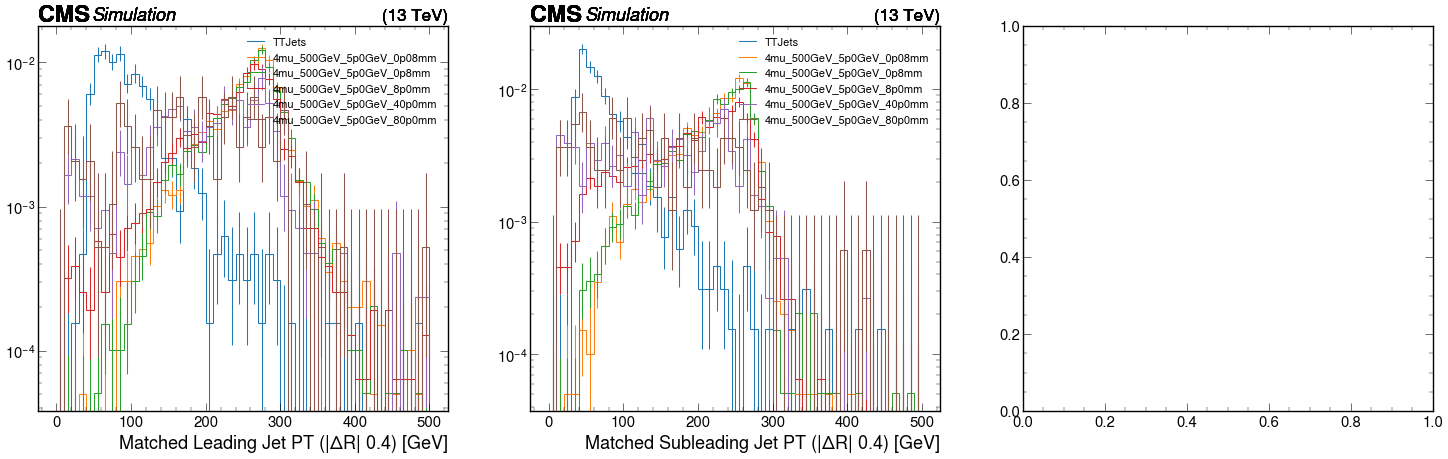

In [4]:
plt.subplots(1,3,figsize=(36,10))

plt.subplot(1,3,1)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["matched_leadingjets_pt"][channels[0], :], flow='none', density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 16})
plt.yscale('log')

plt.subplot(1,3,2)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["matched_subleadingjets_pt"][channels[0], :], flow='none', density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 16})
plt.yscale('log')

plt.subplot(1,3,3)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["matchedjet_matchedjet_ptRatio"][channels[0], :], flow='none', density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 16})
plt.yscale('log')

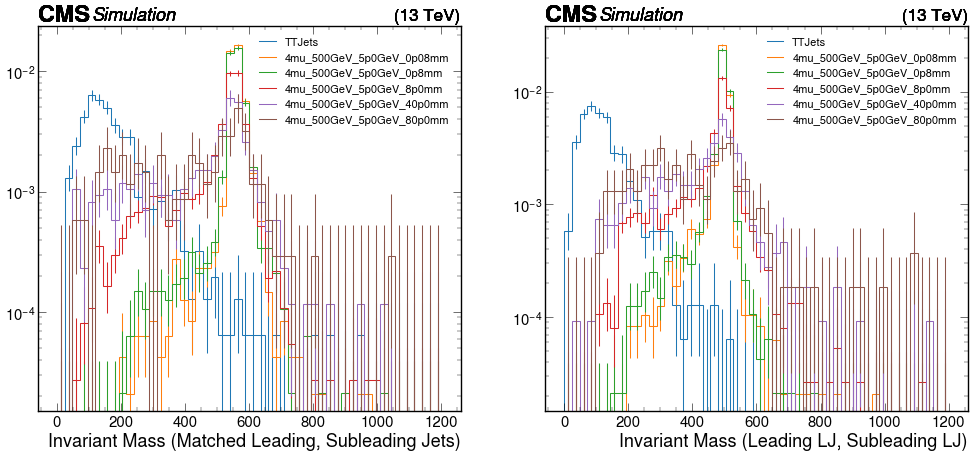

In [5]:
plt.subplots(1,2,figsize=(24,10))

plt.subplot(1,2,1)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["matchedjet_matchedjet_invmass"][channels[0], :], flow='none', density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 16})
plt.yscale('log')

plt.subplot(1,2,2)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["lj_lj_invmass"][channels[0], :], flow='none', density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 16})
plt.yscale('log')